In [6]:
import glob
import os
import time
from scipy.io import loadmat
import cobra
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df_BRCAcancer1 = pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/DataFrames Flujos Prueba/df_BRCAcancer1.txt', sep='\t')
df_BRCAcancer2 = pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/DataFrames Flujos Prueba/df_BRCAcancer2.txt', sep='\t')
df_BRCAcancer3 = pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/DataFrames Flujos Prueba/df_BRCAcancer3.txt', sep='\t')
df_BRCAcontrol1 = pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/DataFrames Flujos Prueba/df_BRCAcontrol1.txt', sep='\t')
df_BRCAcontrol2 = pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/DataFrames Flujos Prueba/df_BRCAcontrol2.txt', sep='\t')
df_BRCAcontrol3 = pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/DataFrames Flujos Prueba/df_BRCAcontrol3.txt', sep='\t')


print(df_BRCAcancer1)
print(df_BRCAcancer2)
print(df_BRCAcancer3)
print(df_BRCAcontrol1)
print(df_BRCAcontrol2)
print(df_BRCAcontrol3)

         Reacciones  Flujos_BRCA_cancer1
0      10FTHF7GLUtl             0.000000
1          10FTHFtl             0.000000
2         13DAMPPOX             0.000000
3              2HBO          -228.826242
4             2HBt2             0.000000
...             ...                  ...
4021  sink_asp_L[c]          1000.000000
4022  sink_glu_L[c]          -777.088348
4023    sink_gly[c]           -95.830226
4024  sink_4abut[l]             0.000000
4025    DM_4abut[c]             0.000000

[4026 rows x 2 columns]
         Reacciones  Flujos_BRCA_cancer2
0      10FTHF7GLUtl             0.000000
1      10FTHF7GLUtm             0.000000
2          10FTHFtl             0.000000
3         13DAMPPOX             0.000000
4          2AMACHYD             0.000000
...             ...                  ...
4132  sink_pro_L[c]           905.159487
4133    sink_gly[c]           884.706830
4134  sink_4abut[l]             0.000000
4135    DM_4abut[c]             0.000000
4136      DM_btn[n]             

In [20]:
reactions_BRCAcancer1 = set(df_BRCAcancer1['Reacciones'])
reactions_BRCAcancer2 = set(df_BRCAcancer2['Reacciones'])
reactions_BRCAcancer3 = set(df_BRCAcancer3['Reacciones'])
reactions_BRCAcontrol1 = set(df_BRCAcontrol1['Reacciones'])
reactions_BRCAcontrol2 = set(df_BRCAcontrol2['Reacciones'])
reactions_BRCAcontrol3 = set(df_BRCAcontrol3['Reacciones'])


#SELECCION DE REACCIONES QUE NO TIENE CADA MODELO Y AÑADIRLAS A DICHO MODELO:
    #BRCA_CANCER1:
reacciones_a_agregar_BRCAcancer1 = (
    reactions_BRCAcancer2 | reactions_BRCAcancer3 |
    reactions_BRCAcontrol1 | reactions_BRCAcontrol2 | reactions_BRCAcontrol3
) - reactions_BRCAcancer1
reacciones_a_agregar_BRCAcancer1

añadir_BRCAcancer1=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_BRCAcancer1), 'Flujos_BRCA_cancer1': [0]*len(reacciones_a_agregar_BRCAcancer1)})

BRCAcancer1 =pd.concat([df_BRCAcancer1,añadir_BRCAcancer1])


    #BRCA_CANCER2:
reacciones_a_agregar_BRCAcancer2 = (
    reactions_BRCAcancer1 | reactions_BRCAcancer3 |
    reactions_BRCAcontrol1 | reactions_BRCAcontrol2 | reactions_BRCAcontrol3
) - reactions_BRCAcancer2
reacciones_a_agregar_BRCAcancer2

añadir_BRCAcancer2=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_BRCAcancer2), 'Flujos_BRCA_cancer2': [0]*len(reacciones_a_agregar_BRCAcancer2)})

BRCAcancer2 =pd.concat([df_BRCAcancer2,añadir_BRCAcancer2])


    #BRCA_CANCER3:
reacciones_a_agregar_BRCAcancer3 = (
    reactions_BRCAcancer1 | reactions_BRCAcancer2 |
    reactions_BRCAcontrol1 | reactions_BRCAcontrol2 | reactions_BRCAcontrol3
) - reactions_BRCAcancer3
reacciones_a_agregar_BRCAcancer3

añadir_BRCAcancer3=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_BRCAcancer3), 'Flujos_BRCA_cancer3': [0]*len(reacciones_a_agregar_BRCAcancer3)})

BRCAcancer3 =pd.concat([df_BRCAcancer3,añadir_BRCAcancer3])


    #BRCA_CONTROL1:
reacciones_a_agregar_BRCAcontrol1 = (
    reactions_BRCAcancer2 | reactions_BRCAcancer3 |
    reactions_BRCAcancer1 | reactions_BRCAcontrol2 | reactions_BRCAcontrol3
) - reactions_BRCAcontrol1
reacciones_a_agregar_BRCAcontrol1

añadir_BRCAcontrol1=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_BRCAcontrol1), 'Flujos_BRCA_control1': [0]*len(reacciones_a_agregar_BRCAcontrol1)})

BRCAcontrol1 =pd.concat([df_BRCAcontrol1,añadir_BRCAcontrol1])


    #BRCA_CONTROL2:
reacciones_a_agregar_BRCAcontrol2 = (
    reactions_BRCAcancer2 | reactions_BRCAcancer3 |
    reactions_BRCAcancer1 | reactions_BRCAcontrol1 | reactions_BRCAcontrol3
) - reactions_BRCAcontrol2
reacciones_a_agregar_BRCAcontrol2

añadir_BRCAcontrol2=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_BRCAcontrol2), 'Flujos_BRCA_control2': [0]*len(reacciones_a_agregar_BRCAcontrol2)})

BRCAcontrol2 =pd.concat([df_BRCAcontrol2,añadir_BRCAcontrol2])


    #BRCA_CONTROL3:
reacciones_a_agregar_BRCAcontrol3 = (
    reactions_BRCAcancer2 | reactions_BRCAcancer3 |
    reactions_BRCAcancer1 | reactions_BRCAcontrol2 | reactions_BRCAcontrol1
) - reactions_BRCAcontrol3
reacciones_a_agregar_BRCAcontrol3

añadir_BRCAcontrol3=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_BRCAcontrol3), 'Flujos_BRCA_control3': [0]*len(reacciones_a_agregar_BRCAcontrol3)})

BRCAcontrol3 =pd.concat([df_BRCAcontrol3,añadir_BRCAcontrol3])


    #PARA COMPROBAR QUE SE HAN INCORPORADO BIEN LAS REACCIONES (TIENEN QUE TENER LAS MISMAS ROWS)
#print(BRCAcancer1)
#print(BRCAcancer2)
#print(BRCAcancer3)
#print(BRCAcontrol1)
#print(BRCAcontrol2)
#print(BRCAcontrol3)


#PONER LA COLUMNA REACCIONES COMO INDEX:
BRCAcancer1=BRCAcancer1.set_index('Reacciones', drop=True)
BRCAcancer2=BRCAcancer2.set_index('Reacciones', drop=True)
BRCAcancer3=BRCAcancer3.set_index('Reacciones', drop=True)
BRCAcontrol1=BRCAcontrol1.set_index('Reacciones', drop=True)
BRCAcontrol2=BRCAcontrol2.set_index('Reacciones', drop=True)
BRCAcontrol3=BRCAcontrol3.set_index('Reacciones', drop=True)


    #COMPROBAR QUE SE HAN PUESTO LAS REACCIONES COMO INDEX:
#print(BRCAcancer1)
#print(BRCAcancer2)
#print(BRCAcancer3)
#print(BRCAcontrol1)
#print(BRCAcontrol2)
print(BRCAcontrol3)

                                     Flujos_BRCA_control3
Reacciones                                               
10FTHF7GLUtl                                          0.0
10FTHF7GLUtm                                          0.0
10FTHFtl                                              0.0
10FTHFtm                                              0.0
13DAMPPOX                                             0.0
...                                                   ...
r1831                                                 0.0
EX_acnacngal14acglcgalgluside_hs[e]                   0.0
FUT16g                                                0.0
AOBUTDsm                                              0.0
DESAT20_1                                             0.0

[5649 rows x 1 columns]


In [21]:
df = pd.merge(BRCAcancer1, BRCAcancer2, left_index=True, right_index=True)
df1 = pd.merge(df,BRCAcancer3, left_index=True, right_index=True)
df2 = pd.merge(df1,BRCAcontrol1, left_index=True, right_index=True)
df3 = pd.merge(df2,BRCAcontrol2, left_index=True, right_index=True)
BRCA_fluxes = pd.merge(df3, BRCAcontrol3, left_index=True, right_index=True)
BRCA_fluxes

,Flujos_BRCA_cancer1,Flujos_BRCA_cancer2,Flujos_BRCA_cancer3,Flujos_BRCA_control1,Flujos_BRCA_control2,Flujos_BRCA_control3
Reacciones,,,,,,
10FTHF7GLUtl,0.000000,0.000000,0.0,0.000000,0.0,0.0
10FTHFtl,0.000000,0.000000,0.0,0.000000,0.0,0.0
13DAMPPOX,0.000000,0.000000,0.0,0.000000,0.0,0.0
2HBO,-228.826242,0.000000,0.0,-1000.000000,-1000.0,0.0
2HBt2,0.000000,-492.297184,0.0,-631.578947,0.0,0.0
...,...,...,...,...,...,...
3HPPt,0.000000,0.000000,0.0,0.000000,0.0,0.0
HMR_0378,0.000000,0.000000,0.0,0.000000,0.0,0.0
r1831,0.000000,0.000000,0.0,0.000000,0.0,0.0


(array([  26.,    7.,    8.,   17., 5396.,  110.,   23.,   14.,   10.,
          38.]),
 array([-1.00000000e+03, -8.00000000e+02, -6.00000000e+02, -4.00000000e+02,
        -2.00000000e+02,  1.13686838e-13,  2.00000000e+02,  4.00000000e+02,
         6.00000000e+02,  8.00000000e+02,  1.00000000e+03]),
 <BarContainer object of 10 artists>)

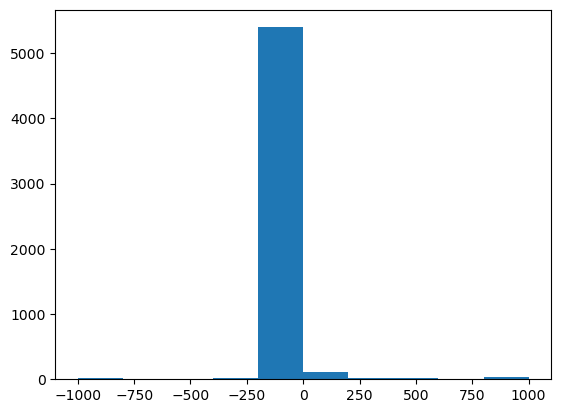

In [22]:
plt.hist(BRCA_fluxes['Flujos_BRCA_cancer1'])

In [23]:
def flux_transformer(v):

    '''
    This function transforms fluxes into log2 scale with three additions:
    - zero values are kept.
    - values between 0 and 2 are adjusted to fit below one.
    - negative fluxes are considered. 
    '''

    def adjusted(v):
        new = (np.log2(v + 0.125) + 3) / 4
        return np.min([new, 1])

    if v == 0:
        vprime = 0
    elif v > 0:
        if v < 2:
            vprime = adjusted(v)
        else:
            vprime = np.log2(v)
    elif v < 0:
        v = np.abs(v)
        if v < 2:
            vprime = -adjusted(v)
        else:
            vprime = -np.log2(v)
    else:
        raise ValueError('found value not considered')

    return vprime

(array([  50.,   28.,   24.,   21.,   20., 5324.,   39.,   20.,   47.,
          76.]),
 array([-9.96578428, -7.97262743, -5.97947057, -3.98631371, -1.99315686,
         0.        ,  1.99315686,  3.98631371,  5.97947057,  7.97262743,
         9.96578428]),
 <BarContainer object of 10 artists>)

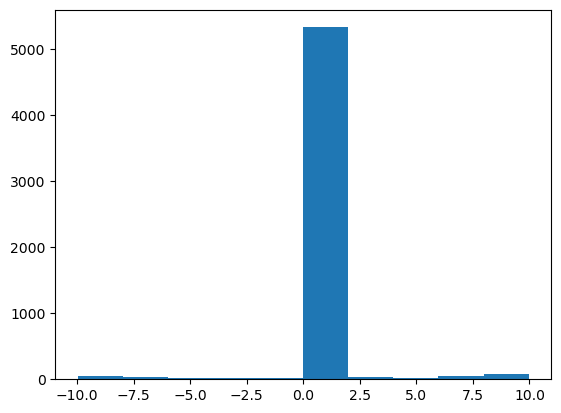

In [27]:
#COMPROBAR DISTRIBUCIÓN CON DADAS SIN TRANSFORMAR:
t_df_BRCAcancer1=BRCA_fluxes['Flujos_BRCA_cancer1'].apply(flux_transformer)
plt.hist(t_df_BRCAcancer1)

In [31]:
t_BRCAfluxes= BRCA_fluxes.applymap(flux_transformer)
t_BRCAfluxes

,Flujos_BRCA_cancer1,Flujos_BRCA_cancer2,Flujos_BRCA_cancer3,Flujos_BRCA_control1,Flujos_BRCA_control2,Flujos_BRCA_control3
Reacciones,,,,,,
10FTHF7GLUtl,0.000000,0.000000,0.0,0.000000,0.000000,0.0
10FTHFtl,0.000000,0.000000,0.0,0.000000,0.000000,0.0
13DAMPPOX,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2HBO,-7.838109,0.000000,0.0,-9.965784,-9.965784,0.0
2HBt2,0.000000,-8.943386,0.0,-9.302819,0.000000,0.0
...,...,...,...,...,...,...
3HPPt,0.000000,0.000000,0.0,0.000000,0.000000,0.0
HMR_0378,0.000000,0.000000,0.0,0.000000,0.000000,0.0
r1831,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [154]:
#t=t_BRCAfluxes.transpose()
#t

In [32]:
from scipy import stats
from statsmodels.stats import multitest
import seaborn as sns

In [143]:
t_statistic, p_values = stats.ttest_ind(t_BRCAfluxes[['Flujos_BRCA_cancer1', 'Flujos_BRCA_cancer2', 'Flujos_BRCA_cancer3']],
                                        t_BRCAfluxes[['Flujos_BRCA_control1', 'Flujos_BRCA_control2', 'Flujos_BRCA_control3']], 
                                        axis = 1, nan_policy = 'omit')
#for p_value in p_values:
 #   print(p_value)

C:\Users\NOE\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


In [38]:
p_values

array([       nan,        nan,        nan, ...,        nan, 0.37390097,
              nan])

In [153]:
fold_change = np.log2(np.mean(t_BRCAfluxes[['Flujos_BRCA_cancer1','Flujos_BRCA_cancer2', 'Flujos_BRCA_cancer3']], axis = 1)) - np.log2(np.mean(t_BRCAfluxes[['Flujos_BRCA_control1','Flujos_BRCA_control2', 'Flujos_BRCA_control3']], axis = 1))
fold_change[np.isnan(fold_change)] = 0
p_values[np.isnan(p_values)] = 1.0  
reject, q_values = multitest.fdrcorrection(p_values)

fold_change



C:\Users\NOE\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\NOE\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\NOE\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\NOE\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


Reacciones
10FTHF7GLUtl    0.0
10FTHFtl        0.0
13DAMPPOX       0.0
2HBO            0.0
2HBt2           0.0
               ... 
3HPPt           0.0
HMR_0378        0.0
r1831           0.0
AOBUTDsm        inf
DESAT20_1       0.0
Length: 5649, dtype: float64

In [152]:

t_BRCAfluxes['Fold_Change']= fold_change
t_BRCAfluxes['Q_values']= q_values
t_BRCAfluxes['P_values']=p_values
t_BRCAfluxes

,Flujos_BRCA_cancer1,Flujos_BRCA_cancer2,Flujos_BRCA_cancer3,Flujos_BRCA_control1,Flujos_BRCA_control2,Flujos_BRCA_control3,Fold_Change,Q_values,P_values
Reacciones,,,,,,,,,
10FTHF7GLUtl,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,1.000000
10FTHFtl,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,1.000000
13DAMPPOX,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,1.000000
2HBO,-7.838109,0.000000,0.0,-9.965784,-9.965784,0.0,0.0,1.0,0.394183
2HBt2,0.000000,-8.943386,0.0,-9.302819,0.000000,0.0,0.0,1.0,0.979113
...,...,...,...,...,...,...,...,...,...
3HPPt,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,1.000000
HMR_0378,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,1.000000
r1831,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,1.000000


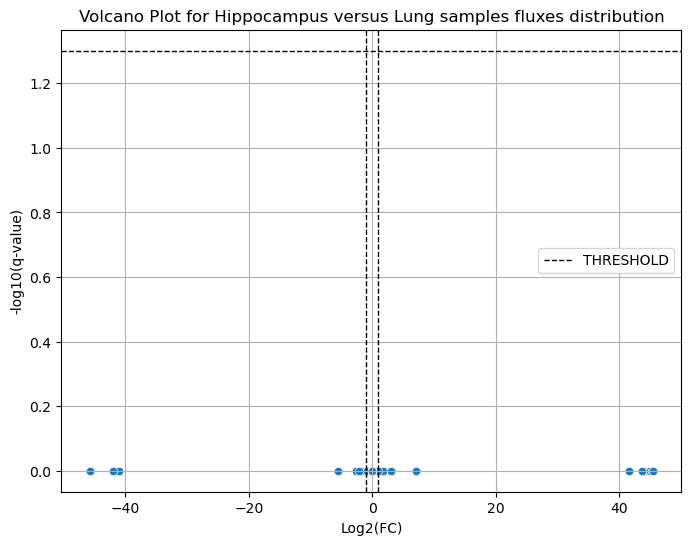

In [146]:
plt.figure(figsize = (8, 6))

sns.scatterplot(x = t_results['log_fc'], y = -np.log10(t_results['q_value']))
plt.axhline(-np.log10(0.05), color = 'k', linestyle = '--', linewidth = 1, label = 'THRESHOLD')
plt.axvline(1, color = 'k', linestyle = '--', linewidth = 1)
plt.axvline(-1, color = 'k', linestyle = '--', linewidth = 1)

plt.xlabel('Log2(FC)')
plt.ylabel('-log10(q-value)')
plt.title('Volcano Plot')
plt.legend()
plt.grid(True)
plt.show()